# Aula do dia 3 de outubro

Coleção dogs_and_cats disponível em:

http://papaleguas.icomp.ufam.edu.br/~marco/downloads/dogs_and_cats.tgz

Descompactar em data:
```bash
tar xzvf dogs_and_cats.tgz
```

## Transferência de Aprendizagem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def reset_graph(seed = 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def plot_colorfigs(lst):
    'Exibe figuras coloridas em lista lst.'
    if len(lst) == 1:
        plt.imshow(lst[0], interpolation = 'nearest')
        plt.axis = 'off'
    else:
        f, axes = plt.subplots(1, len(lst))
        for i, a in enumerate(axes):
            a.imshow(lst[i], interpolation = 'nearest')
            a.set(aspect = 'equal')
            a.set_axis_off()

In [3]:
from sklearn.neighbors import NearestNeighbors

def plot_most_similar(features, n = 3, rquery = None, k = 2):
    neigh = NearestNeighbors(k)
    neigh.fit(features) 
    # random query
    if not rquery:
        rquery = random.randint(0, len(features))
    indices = neigh.kneighbors([features[rquery]], n, return_distance=False)
    plot_colorfigs([image.load_img(dogs_cats100[i], 
                                   target_size=(299, 299)) for i in indices[0]])

#### Transferência com Keras

In [4]:
# from keras.applications.inception_v3 import InceptionV3
import keras.applications.inception_v3 as iv3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Using TensorFlow backend.


In [5]:
print iv3.WEIGHTS_PATH
print iv3.WEIGHTS_PATH_NO_TOP

https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [6]:
iv3.WEIGHTS_PATH = 'http://papaleguas.icomp.ufam.edu.br/~marco/downloads/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
iv3.WEIGHTS_PATH_NO_TOP = 'http://papaleguas.icomp.ufam.edu.br/~marco/downloads/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [7]:
# deve requerer pacote h5py
# entrem em seu ambiente virtual e instalem com:
#   pip install h5py
# (resetem o notebook)
base_model = iv3.InceptionV3(weights = 'imagenet')

### cães e gatos

In [11]:
dogs_cats = !find data/dogs_and_cats -name "*.jpg"

In [12]:
dogs_cats[:5]

['data/dogs_and_cats/validation/cats/cat.10188.jpg',
 'data/dogs_and_cats/validation/cats/cat.10260.jpg',
 'data/dogs_and_cats/validation/cats/cat.10026.jpg',
 'data/dogs_and_cats/validation/cats/cat.10270.jpg',
 'data/dogs_and_cats/validation/cats/cat.10189.jpg']

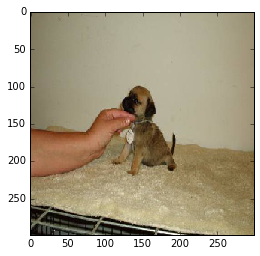

In [32]:
import random
rimg = random.randint(0, len(dogs_cats)-1)
imgf = dogs_cats[rimg]
img = image.load_img(imgf, target_size = (299,299))
plot_colorfigs([img])

### Classificando com Inception V3

In [33]:
x = image.img_to_array(img)
x.shape

(299, 299, 3)

In [34]:
x = np.expand_dims(x, axis = 0)
x.shape

(1, 299, 299, 3)

In [35]:
x = iv3.preprocess_input(x)

In [36]:
preds = base_model.predict(x)
print('Class:', iv3.decode_predictions(preds))

('Class:', [[(u'n02093754', u'Border_terrier', 0.63251901), (u'n02112706', u'Brabancon_griffon', 0.10814542), (u'n02110958', u'pug', 0.07529562), (u'n02086079', u'Pekinese', 0.019529993), (u'n02105162', u'malinois', 0.016810669)]])


In [40]:
for i, layer in enumerate(base_model.layers):
    print i, layer.name

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [41]:
model_at_layer = Model(inputs = base_model.input,
                      outputs = base_model.get_layer('avg_pool').output)

In [42]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = iv3.preprocess_input(x)

In [43]:
features = model_at_layer.predict(x)

In [47]:
print features.shape
print features

(1, 2048)
[[ 0.09059304  0.18116829  0.27369255 ...,  0.56327748  0.4500379
   0.39646986]]


In [48]:
dogs_cats100 = random.sample(dogs_cats, 100)

features = []
for imgf in dogs_cats100:
    img = image.load_img(imgf, target_size = (299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = iv3.preprocess_input(x)
    features += [model_at_layer.predict(x)]

In [49]:
for i in range(len(features)):
    features[i] = features[i].reshape((2048,))

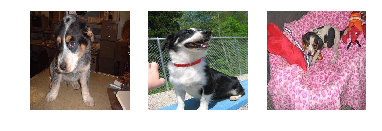

In [55]:
plot_most_similar(features)

### Retreino para cães e gatos

In [58]:
img_height, img_width = 150, 150
train_data_dir = 'data/dogs_and_cats/train'
validation_data_dir = 'data/dogs_and_cats/validation'

In [59]:
base_model = iv3.InceptionV3(weights = 'imagenet', 
                             include_top = False)

In [60]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
preds = Dense(2, activation = 'softmax')(x)

model = Model(inputs = base_model.input,
              outputs = preds)

In [61]:
for layer in base_model.layers:
    layer.trainable = False

In [62]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [63]:
from keras.preprocessing.image import ImageDataGenerator, \
    array_to_img, img_to_array, load_img
from PIL import Image

In [64]:
datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )

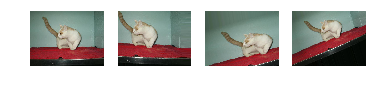

In [69]:
img = load_img(dogs_cats[random.randint(0, len(dogs_cats)-1)])
x = img_to_array(img)
figs = [img]
figs += [array_to_img(datagen.random_transform(x)) for i in range(3)]
plot_colorfigs(figs)

In [71]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir, target_size = (img_width, img_height),
    batch_size = 16, class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, target_size = (img_width, img_height),
    batch_size = 16, class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [72]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000 // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 800 // batch_size)

Epoch 1/20
125/125 [==============================] - 9s - loss: 0.5418 - acc: 0.7430 - val_loss: 0.2989 - val_acc: 0.8738
Epoch 2/20
125/125 [==============================] - 8s - loss: 0.4073 - acc: 0.8160 - val_loss: 0.3592 - val_acc: 0.8387
Epoch 3/20
125/125 [==============================] - 8s - loss: 0.4148 - acc: 0.8100 - val_loss: 0.3381 - val_acc: 0.8400
Epoch 4/20
125/125 [==============================] - 8s - loss: 0.3905 - acc: 0.8150 - val_loss: 0.3276 - val_acc: 0.8313
Epoch 5/20
125/125 [==============================] - 8s - loss: 0.3597 - acc: 0.8530 - val_loss: 0.4063 - val_acc: 0.8113
Epoch 6/20
125/125 [==============================] - 8s - loss: 0.3359 - acc: 0.8480 - val_loss: 0.3339 - val_acc: 0.8350
Epoch 7/20
125/125 [==============================] - 8s - loss: 0.3645 - acc: 0.8315 - val_loss: 0.3573 - val_acc: 0.83370.83
Epoch 8/20
125/125 [==============================] - 8s - loss: 0.3310 - acc: 0.8495 - val_loss: 0.4941 - val_acc: 0.7987
Epoch 9/20
1

In [ ]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer = SGD(lr = 0.0001, momentum = 0.9),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000 // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 800 // batch_size)

Epoch 1/20
125/125 [==============================] - 13s - loss: 0.2181 - acc: 0.9030 - val_loss: 0.3467 - val_acc: 0.8625
Epoch 2/20
125/125 [==============================] - 10s - loss: 0.1957 - acc: 0.9195 - val_loss: 0.3325 - val_acc: 0.8538
Epoch 3/20
125/125 [==============================] - 10s - loss: 0.1824 - acc: 0.9240 - val_loss: 0.3456 - val_acc: 0.8538
Epoch 4/20
125/125 [==============================] - 10s - loss: 0.1615 - acc: 0.9370 - val_loss: 0.3461 - val_acc: 0.8512
Epoch 5/20
125/125 [==============================] - 10s - loss: 0.1902 - acc: 0.9215 - val_loss: 0.3364 - val_acc: 0.8612
Epoch 6/20
125/125 [==============================] - 10s - loss: 0.1484 - acc: 0.9435 - val_loss: 0.3479 - val_acc: 0.8612
Epoch 7/20
125/125 [==============================] - 10s - loss: 0.1394 - acc: 0.9465 - val_loss: 0.3342 - val_acc: 0.8562
Epoch 8/20
125/125 [==============================] - 10s - loss: 0.1391 - acc: 0.9450 - val_loss: 0.3417 - val_acc: 0.8500
Epoch 9/